# Biathlon Data Challenge

### Fangfang Lee

- Background: Hans is the coach of the Swedish Women National Biathlon team that is currently training for the upcoming winter season. As he couldn’t travel with his team to Canada to join their training camp, he is facing the problem that some of the team members seem to be cheating on their agreed upon training schedule in order to ensure the athletes improve consistently leading up to the first competition. To track progress on their rifle shooting, the athletes have to write down their name on each target board. This week, Hans’s assistant sent him the scanned reports from Canada but many of them don’t have the names of the athletes on the target boards - now Hans can’t judge the progress of his team! He turns to you for help in building a classifier based on the named reports, that he can use to generate predictions for the reports without names. He keeps some reports with names as test data and, depending on the accuracy of your classifier on the test data, Hans will invite you to the world cup finale this winter.   Please send back a JSON file with the same format, where each empty name string is replaced with a name of a team member, as well as a jupyter notebook that contains documentation and explanation of your approach.

- Goal: to output an accuracy score and and an json file

## 1. Examining the Raw Data

In [1]:
import json
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
# load the 12traits data
with open("12traits_biathlon.json", "r") as read_file:
    data = json.load(read_file)

In [3]:
# create a copy of the data
biathlon = data['silhouette_targets']

In [5]:
# upon examining the structure of the data, we found out that the unit is per silhouette per person. The label to predict
# is the individuals
biathlon

[{u'name': u'Persson',
  u'shots': [{u'x': 0.30481398618938044, u'y': 0.4769089569224076},
   {u'x': 0.08254752672437815, u'y': 0.6231545854419579},
   {u'x': -0.06570703868287404, u'y': 0.18276801307578938},
   {u'x': -0.19950536224575632, u'y': 0.04277514867586857},
   {u'x': -0.48209052446388273, u'y': -0.1486862587722918},
   {u'x': -0.051966818786095756, u'y': -0.20272205113575173},
   {u'x': 0.4761007040959099, u'y': 0.25226710985403933},
   {u'x': 0.8388861454357874, u'y': 0.4382699065638803},
   {u'x': -0.39174138324186564, u'y': 0.43270940550370157},
   {u'x': -0.2090816799767541, u'y': 0.6042319463139916},
   {u'x': -0.20956350666407814, u'y': 0.8756834553526813},
   {u'x': -0.18699128521674976, u'y': 0.31834164130396214}]},
 {u'name': u'Dahlmeier',
  u'shots': [{u'x': 0.21946660037482163, u'y': 0.293897627400934},
   {u'x': 0.2945606655599632, u'y': 0.2424010485271275},
   {u'x': -0.04325340451740329, u'y': 0.0014464374879283107},
   {u'x': 0.10292705900243555, u'y': -0.0196

In [9]:
# turn the dictionary into a dataframe b
biathlon = pd.DataFrame.from_dict(biathlon)
biathlon

,name,shots
0,Persson,"[{u'y': 0.476908956922, u'x': 0.304813986189},..."
1,Dahlmeier,"[{u'y': 0.293897627401, u'x': 0.219466600375},..."
2,Persson,"[{u'y': -0.167043218495, u'x': 0.0212908473163..."
3,Dahlmeier,"[{u'y': -0.03191622907, u'x': -0.115708556304}..."
4,Berger,"[{u'y': 0.0843634442491, u'x': 0.09017508204},..."
5,Persson,"[{u'y': 0.340568892442, u'x': -0.524296877697}..."
6,Dahlmeier,"[{u'y': -0.224905715406, u'x': -0.009919418094..."
7,Berger,"[{u'y': 0.0900550410499, u'x': 0.237513069772}..."
8,Persson,"[{u'y': 0.920104426732, u'x': -0.527578227321}..."
9,Dahlmeier,"[{u'y': 0.460311016812, u'x': -0.0147993970072..."


In [10]:
# evaluate the number of labels
biathlon.name.value_counts()

             5000
Persson       173
Berger        167
Dahlmeier     160
Name: name, dtype: int64

In [11]:
pd.DataFrame.from_dict(biathlon['shots'][1])

,x,y
0,0.219467,0.293898
1,0.294561,0.242401
2,-0.043253,0.001446
3,0.102927,-0.019655
4,-0.046694,-0.202798
5,0.120381,-0.208951
6,-0.211678,0.233868


It seems all three members have about the same number of silhouette targets labeled. This could be suggestive that the assumption that the likelihood of not labeling a silhouette target is constant and equal for all team members.
In other words, we can assume that the distribution of missing/shooting on targets is unifomr, which helps us with building a generalized linear model later on.

# 2. Format and Structure the Data

In order to build models and further manipulate the dataset, we need to great data in tidy form. The name should be one column, silhouette id another column, x, and then . 

In [12]:
# define a function that grabs every entry, assign new variables. 
def transforming_variable(id):
    return pd.DataFrame.from_dict(biathlon['shots'][id]).assign(name = biathlon['name'][id],
                                                                 silhouette = id)


In [13]:
# we want to concatenate every coordinates or every athlete and put them into a huge dataframe
# use list comprehension to effectively loop through the entirety of biathlon, get all four variables and concatenate
# them to a temporary dataframe
temp = pd.concat([transforming_variable(id) for id in range(len(biathlon))])

In [14]:
# examining the temporary df to see if it works the way it is supposed to
temp.head(15)

,x,y,name,silhouette
0,0.304814,0.476909,Persson,0
1,0.082548,0.623155,Persson,0
2,-0.065707,0.182768,Persson,0
3,-0.199505,0.042775,Persson,0
4,-0.482091,-0.148686,Persson,0
5,-0.051967,-0.202722,Persson,0
6,0.476101,0.252267,Persson,0
7,0.838886,0.438270,Persson,0
8,-0.391741,0.432709,Persson,0
9,-0.209082,0.604232,Persson,0


# 3.  Feature Engineering

Even though the data is now in tidy format, we cannot build a highly predictive model without manipulating the features to our advantages. Given that the x, y represents the coordinates of each shot relative to the center [0,0].
We could come out with some measurements of how good each player did in terms of shooting. The three features we shall
consider are:
1. Number of shots: if the values are low, assuming the athlete missed the silhouette completely
2. precision: how far away are the shots from the origin 
3. spread: the variability of each of distances between each pairwise shots

In [19]:
from sklearn.metrics.pairwise import paired_distances
from sklearn.metrics.pairwise import euclidean_distances
# this function takes a dataframe as an input, and compute the below metrics
def features_engineering(df):
    count = len(df) # count of number of shots
    distances = euclidean_distances(df[['x', 'y']].values, [[0, 0]]) #computes the euclidean distance between each point(x,y) in the df and the center 
    mu        = distances.mean() # get the mean of the distance. Indicative of how far player misses
    sigma     = distances.std() # standard deviation of the distance. See how stable the performance is
    spread    = np.linalg.norm(euclidean_distances(df[['x', 'y']].values)) # this evaluates the variance of the shots
    output    = pd.DataFrame.from_dict({'silhouette': [df['silhouette'][0]],
                                        'name': [df['name'][0]],
                                        'count': [count],
                                        'mu': [mu],
                                        'sigma': [sigma],
                                        'spread': [spread]
                                       })[['silhouette',
                                          'name',
                                          'count',
                                          'mu',
                                          'sigma',
                                          'spread']]
    return output

In [20]:
# concatenating each resulting dataframe using list comprehension, grouped by silhouette id
data = pd.concat([features_engineering(x[1]) for x in temp.groupby(['silhouette'])])

In [21]:
# examining the first 15 rows of the new data. We found out that the data is structured the way we wanted and is 
# ready to be processed 
data.head(15)

,silhouette,name,count,mu,sigma,spread
0,0,Persson,12,0.523716,0.238832,8.065313
0,1,Dahlmeier,7,0.237290,0.119364,2.510609
0,2,Persson,11,0.469713,0.306988,7.356231
0,3,Dahlmeier,10,0.232245,0.136290,3.657681
0,4,Berger,8,0.422742,0.370083,6.007692
0,5,Persson,12,0.291154,0.162089,5.071535
0,6,Dahlmeier,9,0.209044,0.110752,2.941117
0,7,Berger,10,0.523079,0.196735,6.124603
0,8,Persson,15,0.456050,0.258566,10.371080
0,9,Dahlmeier,10,0.259104,0.106399,3.655289


# 4. Data Visualization & Exploration

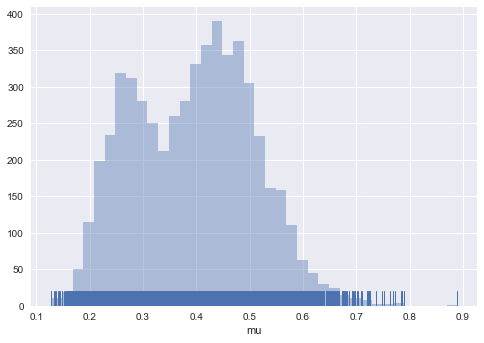

In [13]:
# look at the distribution of the plots
sns.distplot(data['mu'], kde=False, rug=True)

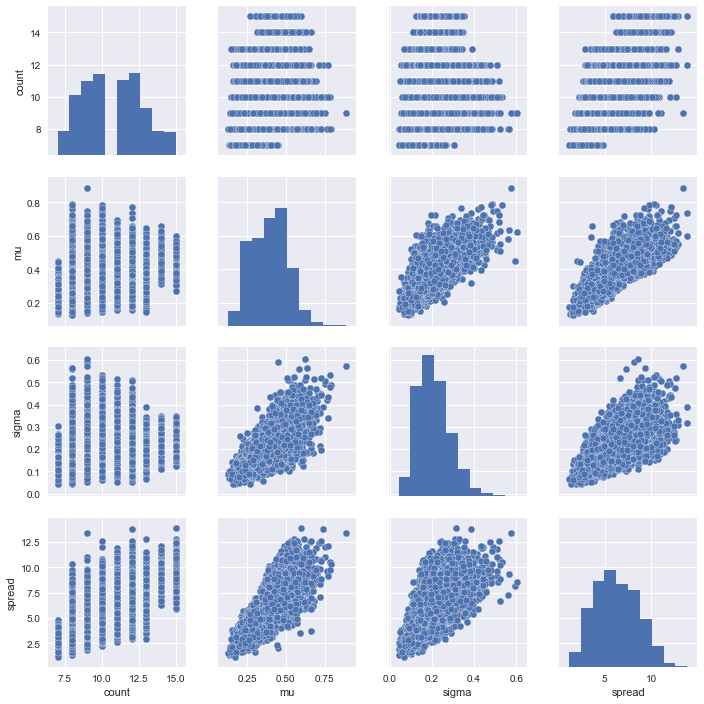

In [22]:
# pairplotting
sns.pairplot(data[['count','mu','sigma','spread']])


Upon examining the pairplots, we can see that distribution for spread. mean, and standard deviation are all approximate normal, with a fair correlation between each of the three variables. However, it is important to take a closer look at how these three measurements vary by players

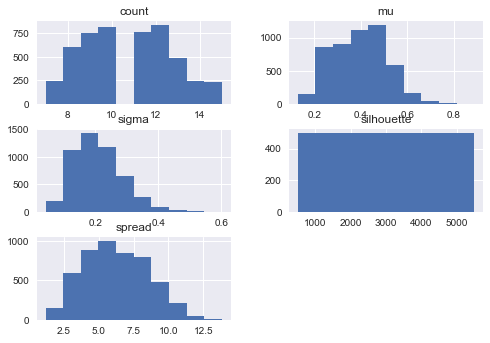

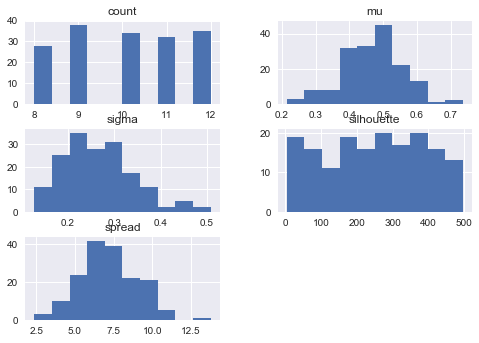

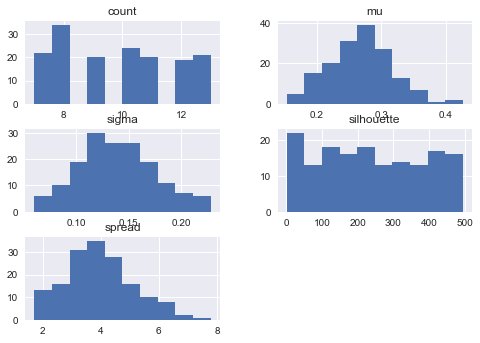

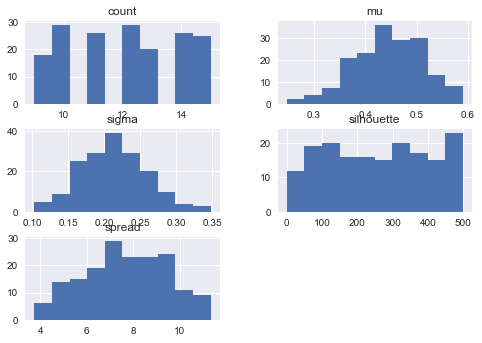

In [15]:
# plotting grouped data
for title, name in data.groupby('name'):
    name.hist()


upon examining the plots, we can see that some differences in each of three athletes' performances. For example, mean distance from target seems to be on the higher end for Persson compared to her Dahlmeier. Berger seems to be more consistent in terms of the distances of each shot from target judging from the spread of the shots. We shall build models to further validate our theories. 

In [110]:
# exploratory data analysis 
data.groupby('name').describe()
# upon seeing the descriptive statistics of each athelete, we can come up with hypothesis such as whether each 
# athelete is truly different from each other in terms of performance by doing analysis of the variance (ANOVA).
# if the performances levels are not different enough, then why should we bother build a model?

count                                                         mu  \
            count       mean       std  min   25%   50%    75%   max   count   
name                                                                           
           5000.0  10.675000  2.070612  7.0   9.0  11.0  12.00  15.0  5000.0   
Berger      167.0  10.047904  1.391923  8.0   9.0  10.0  11.00  12.0   167.0   
Dahlmeier   160.0   9.793750  1.994006  7.0   8.0  10.0  11.25  13.0   160.0   
Persson     173.0  12.052023  1.947765  9.0  10.0  12.0  14.00  15.0   173.0   

                       ...     silhouette          spread                      \
               mean    ...            75%     max   count      mean       std   
name                   ...                                                      
           0.393927    ...        4249.25  5499.0  5000.0  6.231544  2.258710   
Berger     0.467728    ...         367.00   497.0   167.0  7.145946  1.881560   
Dahlmeier  0.268311    ...         373.50   495.0   160.0  3.977109  1.191598   
Persson    0.445249    ...         381.00   499.0   173.0  7.666367  1.768171   

                                                              
                min       25%       50%       75%        max  
name                                                          
           1.191161  4.461398  6.075996  7.935541  13.833492  
Berger     2.360428  5.896654  7.038338  8.540817  13.780904  
Dahlmeier  1.711974  3.210725  3.855245  4.697904   7.784608  
Persson    3.740679  6.385631  7.608622  9.059282  11.337371  

[4 rows x 40 columns]

In [111]:
# examining correlation in data 
data.groupby('name').corr()
# looking at correlation can help us eliminate colinearity and not include redundant variables. By looking at it, 
# we can see some correlation between variables but not so high that we want to discard it. 

count        mu     sigma  silhouette    spread
name                                                                    
          count       1.000000  0.166009  0.068822   -0.000403  0.639850
          mu          0.166009  1.000000  0.736488   -0.003761  0.800379
          sigma       0.068822  0.736488  1.000000    0.006361  0.660776
          silhouette -0.000403 -0.003761  0.006361    1.000000  0.005567
          spread      0.639850  0.800379  0.660776    0.005567  1.000000
Berger    count       1.000000  0.175429  0.157871   -0.036844  0.681954
          mu          0.175429  1.000000  0.554905    0.010484  0.734141
          sigma       0.157871  0.554905  1.000000   -0.053315  0.594977
          silhouette -0.036844  0.010484 -0.053315    1.000000 -0.071886
          spread      0.681954  0.734141  0.594977   -0.071886  1.000000
Dahlmeier count       1.000000  0.172894  0.119430   -0.050107  0.783320
          mu          0.172894  1.000000  0.497940   -0.039024  0.686919
          sigma       0.119430  0.497940  1.000000    0.032804  0.478992
          silhouette -0.050107 -0.039024  0.032804    1.000000 -0.078595
          spread      0.783320  0.686919  0.478992   -0.078595  1.000000
Persson   count       1.000000  0.130226  0.237116   -0.163595  0.820165
          mu          0.130226  1.000000  0.374895   -0.012541  0.552719
          sigma       0.237116  0.374895  1.000000    0.012125  0.489163
          silhouette -0.163595 -0.012541  0.012125    1.000000 -0.099274
          spread      0.820165  0.552719  0.489163   -0.099274  1.000000

In [112]:
# examine overall correlation between data 
data.corr()

,silhouette,count,mu,sigma,spread
silhouette,1.000000,0.000268,-0.005635,0.008243,-0.000680
count,0.000268,1.000000,0.175379,0.077123,0.644540
mu,-0.005635,0.175379,1.000000,0.735540,0.802648
sigma,0.008243,0.077123,0.735540,1.000000,0.662256
spread,-0.000680,0.644540,0.802648,0.662256,1.000000


# 5. Model Building

In [113]:
# encode the name as integers not strings 
data["name"] = data["name"].astype('category')
data.dtypes

silhouette       int64
name          category
count            int64
mu             float64
sigma          float64
spread         float64
dtype: object

In [114]:
# assign the new columns as a categorical variables 
data["name_cat"] = data["name"].cat.codes
data.head()
# now we can see that Berger is 1, Dahmeier is 2, and Persson is 3

,silhouette,name,count,mu,sigma,spread,name_cat
0,0,Persson,12,0.523716,0.238832,8.065313,3
0,1,Dahlmeier,7,0.237290,0.119364,2.510609,2
0,2,Persson,11,0.469713,0.306988,7.356231,3
0,3,Dahlmeier,10,0.232245,0.136290,3.657681,2
0,4,Berger,8,0.422742,0.370083,6.007692,1


In [115]:
# splitting data into variables and response
X = data[['count','mu','sigma','spread']]
y = data['name_cat']

In [116]:
# before splitting the models into training and testing, we want to have some kind of evaluation on how good a model 
# is based on validating on labeled data. So we want to split the training data (data with labels) further into 
# training and testing sets. 
label_set = data[data['name_cat'] != 0]
no_label_set = data[data['name_cat'] == 0]

In [117]:
## build and evaluate models only on the labeled sets
X_label = label_set[['count','mu','sigma','spread']]
y_label = label_set['name_cat']

In [118]:
from sklearn.model_selection import train_test_split
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=4)
print(X_train_label.shape)
print(X_test_label.shape)

(400, 4)
(100, 4)


In [119]:
# establishing baseline performance 
from sklearn.dummy import DummyClassifier
# Create dummy classifer
dummy = DummyClassifier(strategy='uniform', random_state=4)

# "Train" model
dummy.fit(X_train_label, y_train_label)

DummyClassifier(constant=None, random_state=4, strategy='uniform')

In [120]:
# Get accuracy score
print('Accuracy:', dummy.score(X_test_label, y_test_label))  
# baseline measure for accuracy is 0.37, which is really bad

('Accuracy:', 0.37)


In [121]:
# we will use the most basic model, a k-nearest neigbor approach first on the labeled data
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_label, y_train_label)
y_pred_label = knn.predict(X_test_label)
print('Accuracy:' ,metrics.accuracy_score(y_test_label, y_pred_label))

('Accuracy:', 0.78000000000000003)


In [122]:
# grid search for optimal values of k
# try K=1 through K=25 and record testing accuracy# try K= 
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_label, y_train_label)
    y_pred = knn.predict(X_test_label)
    scores.append(metrics.accuracy_score(y_test_label, y_pred_label))
# oddly, the accuracy scores are all 78% accurate despite the methods. This is not bad compared to baseline but also 
# not great.

In [127]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
import random
random.seed(2018)
rf_label=RandomForestClassifier(n_estimators=100)
rf_label.fit(X_train_label,y_train_label)
rf_ypred_label =rf_label.predict(X_test_label)
print("Accuracy:",metrics.accuracy_score(y_test_label, rf_ypred_label))
# random forest classifiers predict an accuracy around 80%, a good improvement from the last one

('Accuracy:', 0.79000000000000004)


In [128]:
# support vector machine classifier 
from sklearn import svm
svm_label = svm.SVC(kernel='linear',gamma=1) 
svm_label.fit(X_train_label, y_train_label)
svm_label.score(X_train_label, y_train_label)
#Predict Output
svm_y_pred= svm_label.predict(X_test_label)
print("Accuracy:",metrics.accuracy_score(y_test_label, svm_y_pred))
## svm also performs comparably with k nearest neigbor and not as good as rf

('Accuracy:', 0.78000000000000003)


In [129]:
# naive bayes classifier
from sklearn.naive_bayes import GaussianNB
nb_label = GaussianNB()
# Train classifier
nb_label.fit(X_train_label, y_train_label)
nb_label_ypred = nb_label.predict(X_test_label)
print("Accuracy:",metrics.accuracy_score(y_test_label, nb_label_ypred))
# Naive Bayes performed disappointingly much to my dismay.

('Accuracy:', 0.72999999999999998)


In [130]:
# since the tree based method performed relatively better than the rest, we shall try some more boosting methods 
# such as adaboost and xgboost 
# adaboost
from sklearn.ensemble import AdaBoostClassifier
ada_label = AdaBoostClassifier()
ada_label_fit = ada_label.fit(X_train_label, y_train_label)
ada_label_ypred = ada_label.predict(X_test_label)
print("Accuracy:",metrics.accuracy_score(y_test_label, ada_label_ypred))
# How disappointing! Only 54%. 

('Accuracy:', 0.54000000000000004)


# 7. Model Implementation and Prediction

In [131]:
# Now we have evaluated the all the models, we have come to the conclusion that random forest is the best option. So 
# now it is a good time to build models on unlabeled data
train = data[data['name_cat'] != 0]
test = data[data['name_cat'] == 0]

In [132]:
# split into x and y
X_train = train[['count','mu','sigma','spread']]
y_train = train.name_cat
X_test = test[['count','mu','sigma','spread']]
y_test = test.name_cat

In [137]:
# train the random forest model 
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf_ypred =rf.predict(X_test)
rf_ypred.size

5000

In [152]:
# the rf_ypred is an array, but in order to store it in the original json file, we need to convert it to a list of 
# strings with the original names. 
predictions = []
for i in rf_ypred:
    if i == 1:
        i = 'Berger'
    elif i == 2:
        i = 'Dahlmeier'
    else:
        i = 'Persson'
    predictions.append(i)

In [154]:
with open('12traits_biathlon.json') as f:
    output = json.load(f)

In [155]:
# replacing the empty names as the predictions
offset = sum(1 for elem in output['silhouette_targets'] if elem['name'] != '') # creating an offset of those that already has names
for idx in range(offset, len(output['silhouette_targets'])):
    output['silhouette_targets'][idx]['name'] = predictions[idx - offset]



In [156]:
with open('12traits_answers.json', 'w') as outfile:
    json.dump(output, outfile)

# 8. Conclusion & Discussion 

## Conclusions: 
This is a supervised learning problem with 5000 unlabeled data and 500 labeled data. The approach is to structure/format the dataset into tidy format, engineer the features, build models, evaluate models, and make predictions. Of all the models implemented, random forests performed the best. Given the structure of the data, this probably due to the variance in each of athlete's performance. 
We can improve the performance of the models by further engineering the features such as: does the athlete shoot right or left of the target more often? What's the proportion of shooting in the silhouette versus missing? 
We should also implement model optimization by doing grid search for the optimal hyperparameters such as tree depth. Cross validation should also be implemented to lower the variance of model prediction.
